# Iris Flower Predictions Project

This project is trying to create a Machine Learning Model which can accept features of a flower and can predict the species that flower belonged to.

+ [Data](#data)
+ [Data Processing](#dataprocessing)
    + [Split Features and Labels](#split)
    + [Categorical Encoding](#catencoding)
+ [Train Test Split](#traintestsplit)
+ [Scaling](#scaling)
+ [Model Building](#modelbuilding)
+ [Model Training](#modeltraining)
+ [Model Evaluation](#modelevaluation)
    + [Model History Metrics](#modelhistory)
    + [Model Evaluate on Test Data](#modelevaluation)
 -----------
+ [Preparing Model for Deployment](#prepdep)
    + [Deployment Prep - Scale the full features dataset](#prepdepscaled)
    + [Deployment Prep - Model Building](#prepdepmodelbuilding)
    + [Deployment Prep - Model Training](#prepdepmodeltraining)
    + [Deployment Prep - Save Model and Scaler](#prepdepsavemodel)
+ [Predicting a Single New Flower](#prepdepsavemodel)
+ [Prediction Function](#predfunc)
----------
+ [CODE FOR DEPLOYMENT](#codefordep)

-------

# <a name=data>Data</a>

For this example we use the very common data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

From Wikipedia:
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


------

# <a name=dataprocessing>Data Processing</a>

##  <a name=split>Split Features and Labels</a>

In [7]:
X = df.drop('species', axis=1)
y = df['species']

In [8]:
X.shape, y.shape

((150, 4), (150,))

##  <a name=catencoding>Categorical Encoding</a>
+ As our label has 3 different values and the problem we are trying to solve is multi categorical problem. So we need to encode those values first.

### There are multiple ways to do one-hot-encoding
+ https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
+ https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
encoder = LabelBinarizer()

In [15]:
y = encoder.fit_transform(y)

In [16]:
# y is now one-hot-encoded
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

------

# <a name=traintestsplit>Train Test Split</a>

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# <a name=scaling>Scaling</a>

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

-------


# <a name=modelbuilding>Model Building</a>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
X_train.shape

(120, 4)

In [31]:
model = Sequential()

model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax')) # multi classification for 3 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

------

# <a name=modeltraining>Model Training</a>

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stopping = EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  verbose=1)

In [34]:
model.fit(x=scaled_X_train, y=y_train,
             validation_data=(scaled_X_test, y_test),
             epochs=300,
             callbacks=[early_stopping])

Epoch 1/300
4/4 [==============================] - 3s 603ms/step - loss: 1.0779 - accuracy: 0.3046 - val_loss: 1.0913 - val_accuracy: 0.2667
Epoch 2/300
4/4 [==============================] - 0s 23ms/step - loss: 1.0656 - accuracy: 0.3390 - val_loss: 1.0905 - val_accuracy: 0.2667
Epoch 3/300
4/4 [==============================] - 0s 24ms/step - loss: 1.0615 - accuracy: 0.3452 - val_loss: 1.0897 - val_accuracy: 0.2667
Epoch 4/300
4/4 [==============================] - 0s 22ms/step - loss: 1.0585 - accuracy: 0.3546 - val_loss: 1.0887 - val_accuracy: 0.2667
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 1.0537 - accuracy: 0.3546 - val_loss: 1.0879 - val_accuracy: 0.2667
Epoch 6/300
4/4 [==============================] - 0s 24ms/step - loss: 1.0457 - accuracy: 0.3796 - val_loss: 1.0872 - val_accuracy: 0.2667
Epoch 7/300
4/4 [==============================] - 0s 20ms/step - loss: 1.0538 - accuracy: 0.3400 - val_loss: 1.0865 - val_accuracy: 0.2667
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 20ms/step - loss: 0.9325 - accuracy: 0.6827 - val_loss: 1.0077 - val_accuracy: 0.5667
Epoch 60/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9517 - accuracy: 0.6598 - val_loss: 1.0055 - val_accuracy: 0.5667
Epoch 61/300
4/4 [==============================] - 0s 22ms/step - loss: 0.9118 - accuracy: 0.7181 - val_loss: 1.0037 - val_accuracy: 0.5667
Epoch 62/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9342 - accuracy: 0.6775 - val_loss: 1.0017 - val_accuracy: 0.5667
Epoch 63/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9245 - accuracy: 0.6806 - val_loss: 0.9996 - val_accuracy: 0.5667
Epoch 64/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9356 - accuracy: 0.6462 - val_loss: 0.9974 - val_accuracy: 0.5667
Epoch 65/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9524 - accuracy: 0.6317 - val_loss: 0.9951 - val_accuracy: 0.5667
Epoch 66/300
4/4 [========

Epoch 117/300
4/4 [==============================] - 0s 32ms/step - loss: 0.7745 - accuracy: 0.6879 - val_loss: 0.8558 - val_accuracy: 0.6000
Epoch 118/300
4/4 [==============================] - 0s 22ms/step - loss: 0.7927 - accuracy: 0.6660 - val_loss: 0.8525 - val_accuracy: 0.6000
Epoch 119/300
4/4 [==============================] - 0s 21ms/step - loss: 0.7633 - accuracy: 0.6837 - val_loss: 0.8494 - val_accuracy: 0.6000
Epoch 120/300
4/4 [==============================] - 0s 24ms/step - loss: 0.7562 - accuracy: 0.7265 - val_loss: 0.8460 - val_accuracy: 0.6000
Epoch 121/300
4/4 [==============================] - 0s 23ms/step - loss: 0.7677 - accuracy: 0.7056 - val_loss: 0.8425 - val_accuracy: 0.6000
Epoch 122/300
4/4 [==============================] - 0s 20ms/step - loss: 0.7891 - accuracy: 0.6598 - val_loss: 0.8388 - val_accuracy: 0.6000
Epoch 123/300
4/4 [==============================] - 0s 19ms/step - loss: 0.7467 - accuracy: 0.7056 - val_loss: 0.8357 - val_accuracy: 0.6000
Epoch 

4/4 [==============================] - 0s 18ms/step - loss: 0.5993 - accuracy: 0.6925 - val_loss: 0.6706 - val_accuracy: 0.6333
Epoch 175/300
4/4 [==============================] - 0s 17ms/step - loss: 0.5777 - accuracy: 0.7206 - val_loss: 0.6679 - val_accuracy: 0.6333
Epoch 176/300
4/4 [==============================] - 0s 18ms/step - loss: 0.5846 - accuracy: 0.7198 - val_loss: 0.6653 - val_accuracy: 0.6333
Epoch 177/300
4/4 [==============================] - 0s 20ms/step - loss: 0.6307 - accuracy: 0.6448 - val_loss: 0.6625 - val_accuracy: 0.6333
Epoch 178/300
4/4 [==============================] - 0s 18ms/step - loss: 0.5769 - accuracy: 0.7146 - val_loss: 0.6599 - val_accuracy: 0.6333
Epoch 179/300
4/4 [==============================] - 0s 28ms/step - loss: 0.6085 - accuracy: 0.6917 - val_loss: 0.6572 - val_accuracy: 0.6333
Epoch 180/300
4/4 [==============================] - 0s 29ms/step - loss: 0.5958 - accuracy: 0.6844 - val_loss: 0.6547 - val_accuracy: 0.6333
Epoch 181/300
4/4 [=

Epoch 232/300
4/4 [==============================] - 0s 24ms/step - loss: 0.4799 - accuracy: 0.7606 - val_loss: 0.5472 - val_accuracy: 0.7333
Epoch 233/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4884 - accuracy: 0.7304 - val_loss: 0.5456 - val_accuracy: 0.7333
Epoch 234/300
4/4 [==============================] - 0s 22ms/step - loss: 0.4690 - accuracy: 0.7669 - val_loss: 0.5443 - val_accuracy: 0.7333
Epoch 235/300
4/4 [==============================] - 0s 24ms/step - loss: 0.4870 - accuracy: 0.7460 - val_loss: 0.5427 - val_accuracy: 0.7333
Epoch 236/300
4/4 [==============================] - 0s 22ms/step - loss: 0.4827 - accuracy: 0.7471 - val_loss: 0.5411 - val_accuracy: 0.7667
Epoch 237/300
4/4 [==============================] - 0s 21ms/step - loss: 0.4776 - accuracy: 0.7648 - val_loss: 0.5398 - val_accuracy: 0.7667
Epoch 238/300
4/4 [==============================] - 0s 22ms/step - loss: 0.5020 - accuracy: 0.7148 - val_loss: 0.5383 - val_accuracy: 0.7667
Epoch 

Epoch 290/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4299 - accuracy: 0.8469 - val_loss: 0.4787 - val_accuracy: 0.8333
Epoch 291/300
4/4 [==============================] - 0s 22ms/step - loss: 0.4153 - accuracy: 0.8740 - val_loss: 0.4781 - val_accuracy: 0.8333
Epoch 292/300
4/4 [==============================] - 0s 18ms/step - loss: 0.3984 - accuracy: 0.8687 - val_loss: 0.4774 - val_accuracy: 0.8333
Epoch 293/300
4/4 [==============================] - 0s 19ms/step - loss: 0.4152 - accuracy: 0.8354 - val_loss: 0.4764 - val_accuracy: 0.8333
Epoch 294/300
4/4 [==============================] - 0s 19ms/step - loss: 0.3980 - accuracy: 0.8521 - val_loss: 0.4755 - val_accuracy: 0.8333
Epoch 295/300
4/4 [==============================] - 0s 19ms/step - loss: 0.4043 - accuracy: 0.8490 - val_loss: 0.4744 - val_accuracy: 0.8333
Epoch 296/300
4/4 [==============================] - 0s 21ms/step - loss: 0.4248 - accuracy: 0.8146 - val_loss: 0.4733 - val_accuracy: 0.8333
Epoch 

-----

# <a name=modelevaluation>Model Evaluation</a>

## <a name=modelhistory>Model History Metrics</a>

In [36]:
metrics = pd.DataFrame(model.history.history)

In [38]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.066882,0.35,1.091250,0.266667
1,1.064567,0.35,1.090540,0.266667
2,1.061760,0.35,1.089653,0.266667
3,1.059447,0.35,1.088720,0.266667
4,1.056945,0.35,1.087869,0.266667


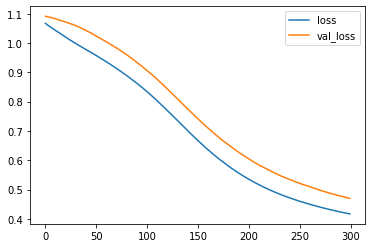

In [39]:
metrics[['loss', 'val_loss']].plot();

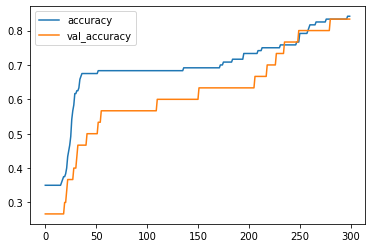

In [40]:
metrics[['accuracy', 'val_accuracy']].plot();

## <a name=modelevaluation>Model Evaluate on Test Data/a>

In [41]:
model.evaluate(scaled_X_test, y_test, verbose=0) # final loss , final accuracy

[0.470024973154068, 0.8333333134651184]

--------
------
----

# <a name=prepdep>Preparing Model for Deployment</a>
+ Once we satsify with our model, we need to prepare model deployment for real world.
+ In this case, we might want to the best of our model and we need to retrain our model on full dataset.

In [42]:
epochs = len(metrics)

epochs

300

## <a name=prepdepscaled>Deployment Prep - Scale the full features dataset</a>

In [43]:
scaled_X = scaler.fit_transform(X)

## <a name=prepdepmodelbuilding>Deployment Prep - Model Building</a>

In [44]:
scaled_X.shape

(150, 4)

In [45]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## <a name=prepdepmodeltraining>Deployment Prep - Model Training</a>

In [46]:
model.fit(x=scaled_X, y=y,
             epochs=epochs,
             verbose=1)

Epoch 1/300
5/5 [==============================] - 1s 4ms/step - loss: 1.1752 - accuracy: 0.3574
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1419 - accuracy: 0.3677
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.3251
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1518 - accuracy: 0.3190
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1431 - accuracy: 0.3550
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1315 - accuracy: 0.3659
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1343 - accuracy: 0.3533
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1423 - accuracy: 0.3077
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1332 - accuracy: 0.3429
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 1.1290 - accuracy: 0.3468
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.3385
Epoch 85/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0767 - accuracy: 0.3255
Epoch 86/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.3424
Epoch 87/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0779 - accuracy: 0.3307
Epoch 88/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0711 - accuracy: 0.3438
Epoch 89/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0683 - accuracy: 0.3555
Epoch 90/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.3498
Epoch 91/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.3368
Epoch 92/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0699 - accuracy: 0.3490
Epoch 93/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.3147
Epoch 94/300
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.6463
Epoch 168/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8714 - accuracy: 0.7092
Epoch 169/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8670 - accuracy: 0.6866
Epoch 170/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.6480
Epoch 171/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.6437
Epoch 172/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.6832
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.6563
Epoch 174/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.6758
Epoch 175/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8518 - accuracy: 0.7005
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.8458 - accuracy: 0.6918
Epoch 177/300
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6719
Epoch 250/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7118
Epoch 251/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6771
Epoch 252/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6693
Epoch 253/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7153
Epoch 254/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6910
Epoch 255/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6311
Epoch 256/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6810
Epoch 257/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6363
Epoch 258/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6736
Epoch 259/300
5/5 [=====

## <a name=prepdepsavemodel>Deployment Prep - Save Model and Scaler</a>

In [47]:
model.save('../Models/final_iris_model.h5')

In [48]:
import joblib

In [49]:
joblib.dump(scaler, '../Models/iris_scaler.pkl')

['../Models/iris_scaler.pkl']

---------
--------
-------

# <a name=prepdepsavemodel>Predicting a Single New Flower</a>

### Load model and scaler (just for testing purpose)

In [50]:
from tensorflow.keras.models import load_model

In [51]:
iris_model = load_model('../Models/final_iris_model.h5')

In [52]:
iris_scaler = joblib.load('../Models/iris_scaler.pkl')

-----

### Dummy Test Flower

In [53]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [56]:
flower_example = {
    'sepal_length': 5.1,
    'sepal_width': 3.5,
    'petal_length': 1.4,
    'petal_width': 0.2, 
}

In [57]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### our encoder has classes of species with related index
+ setosa at index 0, versicolor at index 1, virginica at index 2
+ if flower is belonged to that class, their related index value will be lighted up with 1 (one-hot-encoded)

In [61]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# <a name=predfunc>Prediction Function</a>

Resource why we use axis=-1 in predict() method: https://numpy.astrotech.io/array-axis.html

In [78]:
def return_prediction(model, scaler, sample_json):
    
    sepal_length = sample_json['sepal_length']
    sepal_width = sample_json['sepal_width']
    petal_length = sample_json['petal_length']
    petal_width = sample_json['petal_width']
    
    flower = [[sepal_length, sepal_width, petal_length, petal_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    
    return classes[class_index]

In [79]:
# call the function for predictions
return_prediction(iris_model, iris_scaler, flower_example)

'setosa'

----------

# <a name=codefordep>CODE FOR DEPLOYMENT</a>

In [80]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

iris_model = load_model('../Models/final_iris_model.h5')
iris_scaler = joblib.load('../Models/iris_scaler.pkl')

def return_prediction(model, scaler, sample_json):
    
    sepal_length = sample_json['sepal_length']
    sepal_width = sample_json['sepal_width']
    petal_length = sample_json['petal_length']
    petal_width = sample_json['petal_width']
    
    flower = [[sepal_length, sepal_width, petal_length, petal_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    
    return classes[class_index]